In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
data = pd.read_csv("results.csv")

In [4]:
data.columns

Index(['home_team', 'away_team', 'home_goals', 'away_goals', 'result',
       'season'],
      dtype='object')

In [5]:
data_stats = pd.read_csv("stats.csv")
data_stats.columns

Index(['team', 'wins', 'losses', 'goals', 'total_yel_card', 'total_red_card',
       'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',
       'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal',
       'att_obox_goal', 'goal_fastbreak', 'total_offside', 'clean_sheet',
       'goals_conceded', 'saves', 'outfielder_block', 'interception',
       'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance',
       'own_goals', 'penalty_conceded', 'pen_goals_conceded', 'total_pass',
       'total_through_ball', 'total_long_balls', 'backward_pass',
       'total_cross', 'corner_taken', 'touches', 'big_chance_missed',
       'clearance_off_line', 'dispossessed', 'penalty_save',
       'total_high_claim', 'punches', 'season'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
home_team     4560 non-null object
away_team     4560 non-null object
home_goals    4560 non-null float64
away_goals    4560 non-null float64
result        4560 non-null object
season        4560 non-null object
dtypes: float64(2), object(4)
memory usage: 213.8+ KB


In [7]:
data.corr()

,home_goals,away_goals
home_goals,1.000000,-0.070151
away_goals,-0.070151,1.000000


In [8]:
data_stats.corr()

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,...,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches
wins,1.000000,-0.890199,0.899236,-0.211276,-0.084818,0.753944,0.825577,0.512426,0.354752,0.398314,...,0.622935,0.208196,0.702131,0.704645,0.604178,-0.316998,0.260774,-0.032365,-0.162252,0.007351
losses,-0.890199,1.000000,-0.825820,0.235155,0.116112,-0.710323,-0.775273,-0.490826,-0.373599,-0.379356,...,-0.584510,-0.226708,-0.673469,-0.656575,-0.635046,0.293553,-0.273270,0.017236,0.147711,-0.010721
goals,0.899236,-0.825820,1.000000,-0.235392,-0.084373,0.788062,0.882988,0.564536,0.442670,0.492004,...,0.625073,0.216077,0.737691,0.733838,0.650628,-0.268003,0.269028,-0.000698,-0.222321,0.017450
total_yel_card,-0.211276,0.235155,-0.235392,1.000000,0.033770,-0.253648,-0.265842,-0.128863,-0.089670,-0.095150,...,-0.227163,-0.144025,-0.240047,-0.246781,-0.248291,-0.047345,-0.137412,-0.014418,0.094843,-0.073962
total_red_card,-0.084818,0.116112,-0.084373,0.033770,1.000000,-0.028250,-0.094543,-0.127432,-0.014242,0.038967,...,-0.106229,0.020976,-0.090034,-0.067673,0.032303,0.112337,-0.001112,0.062797,0.037623,0.089275
total_scoring_att,0.753944,-0.710323,0.788062,-0.253648,-0.028250,1.000000,0.938888,0.605026,0.271458,0.353282,...,0.521721,0.363540,0.794554,0.711154,0.726253,-0.174188,0.424606,-0.003246,-0.101241,0.138381
ontarget_scoring_att,0.825577,-0.775273,0.882988,-0.265842,-0.094543,0.938888,1.000000,0.626005,0.311790,0.395763,...,0.631762,0.257334,0.786692,0.767850,0.735622,-0.225950,0.373564,-0.005862,-0.166715,0.096687
hit_woodwork,0.512426,-0.490826,0.564536,-0.128863,-0.127432,0.605026,0.626005,1.000000,0.236210,0.191067,...,0.429798,0.170618,0.536658,0.531672,0.587715,-0.128247,0.162003,0.042172,-0.178729,-0.049829
att_hd_goal,0.354752,-0.373599,0.442670,-0.089670,-0.014242,0.271458,0.311790,0.236210,1.000000,0.132276,...,0.081814,0.299689,0.296625,0.173216,0.219387,-0.075413,0.108598,0.017676,-0.048019,-0.115129
att_pen_goal,0.398314,-0.379356,0.492004,-0.095150,0.038967,0.353282,0.395763,0.191067,0.132276,1.000000,...,0.186675,0.056393,0.332663,0.244434,0.308450,-0.094283,0.146317,0.020114,-0.017222,0.127869


In [9]:
data.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


In [10]:
data_stats.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


In [11]:
data_liv = data_stats[data_stats.team=="Liverpool"]

In [12]:
data_liv.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
23,Liverpool,21.0,4.0,67.0,45.0,1.0,686.0,214.0,13.0,7.0,...,932.0,237.0,25857.0,NaN,4.0,613.0,1.0,42.0,22.0,2007-2008
42,Liverpool,25.0,2.0,77.0,50.0,0.0,736.0,224.0,26.0,14.0,...,1021.0,269.0,29875.0,NaN,0.0,470.0,0.0,61.0,19.0,2008-2009
64,Liverpool,18.0,11.0,61.0,55.0,5.0,642.0,189.0,20.0,6.0,...,1017.0,268.0,28704.0,NaN,1.0,489.0,1.0,52.0,28.0,2009-2010
84,Liverpool,17.0,14.0,59.0,63.0,2.0,582.0,205.0,12.0,8.0,...,824.0,212.0,24941.0,43.0,6.0,493.0,0.0,74.0,26.0,2010-2011


In [13]:
#extracting wins per season

feature_wins = ['wins','season']
data_winsPseason = data_liv[feature_wins]
data_winsPseason.head()

,wins,season
2,20.0,2006-2007
23,21.0,2007-2008
42,25.0,2008-2009
64,18.0,2009-2010
84,17.0,2010-2011


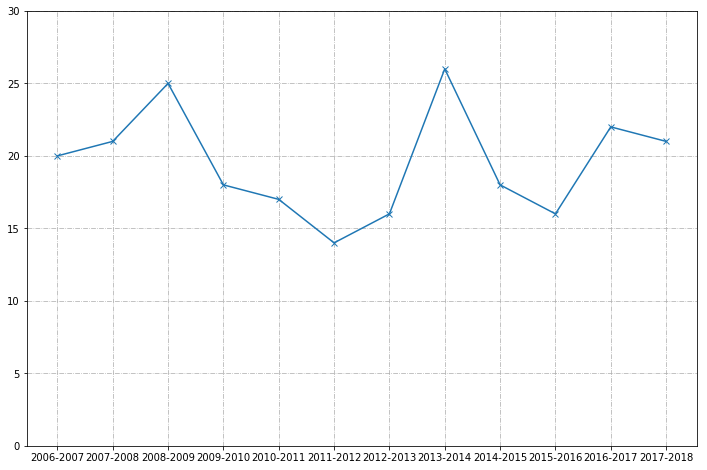

In [14]:
#plotting wins per season

plt.rcParams['figure.figsize'] = [12,8]
plt.plot(data_winsPseason.season, data_winsPseason.wins, label = "wins", marker = 'x')
plt.ylim(0,30)
plt.grid(which='major', axis='both', linestyle = '-.', linewidth = 0.75)